In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm


In [2]:
'''
Data_Set_Details
The following describes the dataset variables:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's
'''

"\nData_Set_Details\nThe following describes the dataset variables:\n\nCRIM - per capita crime rate by town\n\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\nINDUS - proportion of non-retail business acres per town.\n\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\nNOX - nitric oxides concentration (parts per 10 million)\n\nRM - average number of rooms per dwelling\n\nAGE - proportion of owner-occupied units built prior to 1940\n\nDIS - weighted distances to five Boston employment centres\n\nRAD - index of accessibility to radial highways\n\nTAX - full-value property-tax rate per $10,000\n\nPTRATIO - pupil-teacher ratio by town\n\nLSTAT - % lower status of the population\n\nMEDV - Median value of owner-occupied homes in $1000's\n"

In [3]:
# Load house data from the URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
House_data=pd.read_csv(URL)

In [4]:
# Data Set
House_data.head(4)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4


In [17]:
# Data Set
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


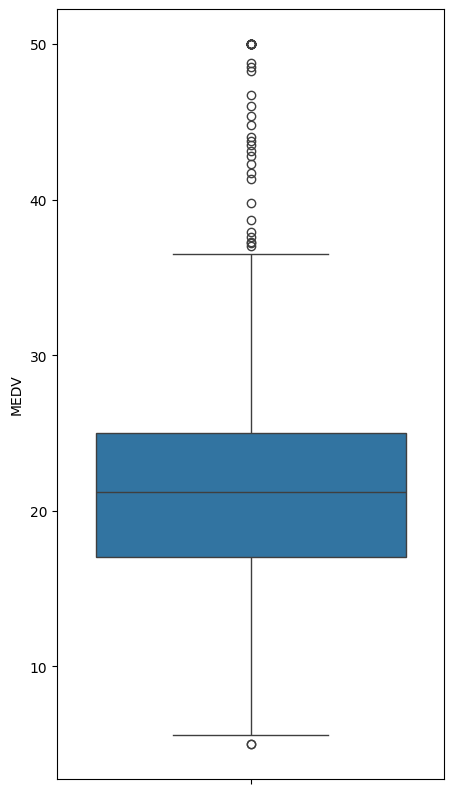

In [5]:
#Median Vlaues of MEDV from box plot
plt.figure(figsize=(5,10))
ax=sns.boxplot(y='MEDV',data=House_data)

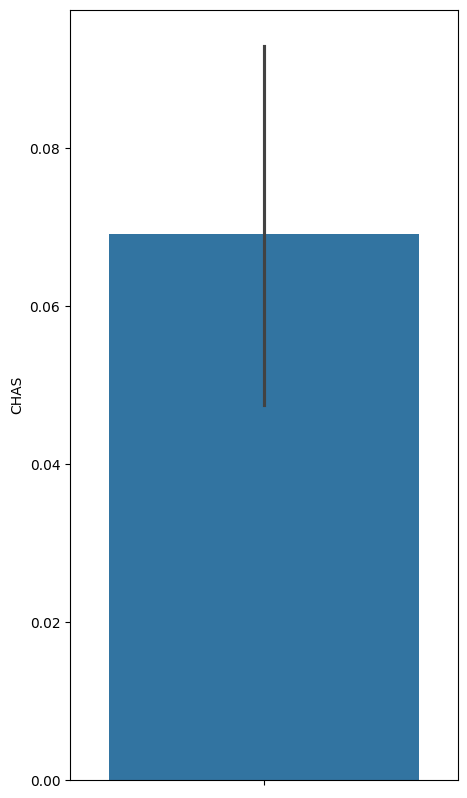

In [6]:
#Bar Chart for CHAS
plt.figure(figsize=(5,10))
ax=sns.barplot(y='CHAS',data=House_data)

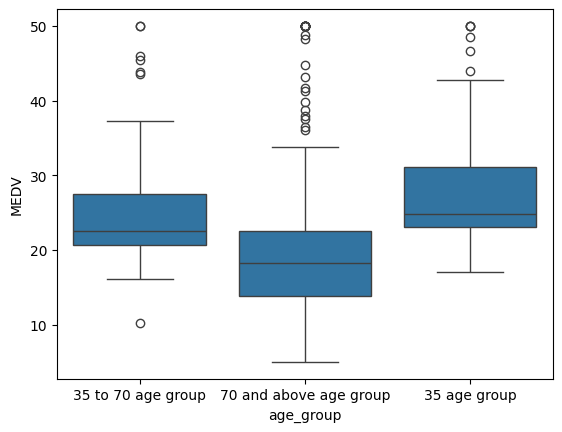

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)
# Lable the data with defined age group
House_data.loc[(House_data['AGE']<=35),'age_group'] = '35 age group'
House_data.loc[(House_data['AGE']>35)&(House_data['AGE']<=70),'age_group'] = '35 to 70 age group'
House_data.loc[(House_data['AGE']>70),'age_group'] = '70 and above age group'

#Plot
ax=sns.boxplot(x='age_group',y='MEDV',data=House_data)

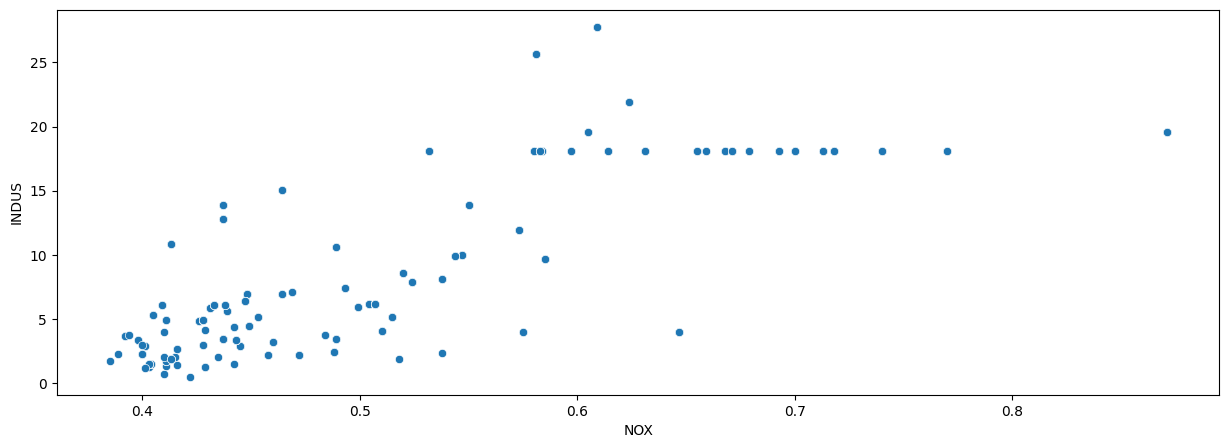

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?
plt.figure(figsize=(15,5))
ax=sns.scatterplot(ax = sns.scatterplot(x='NOX', y='INDUS',  data=House_data))

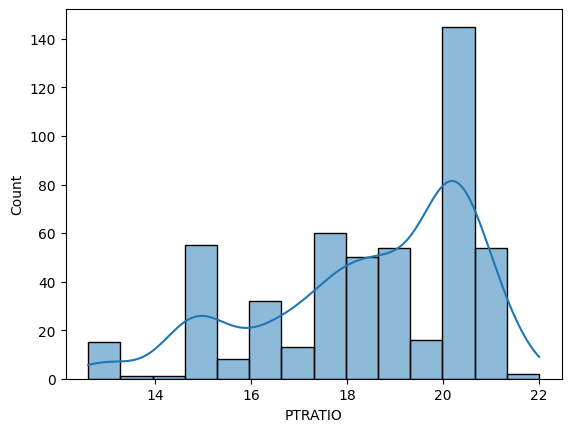

In [10]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(House_data['PTRATIO'], kde = True)

In [11]:
#Is there a significant difference in median value of houses bounded by the 
# Charles river or not? (T-test for independent samples)
#Import Libraries
import scipy.stats

scipy.stats.levene(House_data[House_data['CHAS'] == 0]['MEDV'],
                   House_data[House_data['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [12]:
scipy.stats.ttest_ind(House_data[House_data['CHAS'] == 0]['MEDV'],
                   House_data[House_data['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner 
# occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(House_data[House_data['age_group'] == '35 age group']['MEDV'],
                   House_data[House_data['age_group'] == '35 to 70 age group']['MEDV'], 
                   House_data[House_data['age_group'] == '70 and above age group']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
#Categorise the data in to three different series
thirtyfive_lower = House_data[House_data['age_group'] == '35 age group']['MEDV']
thirtyfive_seventy = House_data[House_data['age_group'] == '35 to 70 age group']['MEDV']
seventy_older = House_data[House_data['age_group'] == '70 and above age group']['MEDV']

In [15]:
#run oneay annova test
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [16]:
#Regression analysis
#State the Hypothesis
'''
Hypothesis:
 Dis is not correlated with MEDV = Null Hypothesis
 Dis is correlated with MEDV = Alternate Hypothesis
'''
X = House_data['DIS']
y = House_data['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        11:59:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""